In [1]:
import curr_adventure as cad 
import jax.numpy as jnp
from jax import random as jrandom

from curr_adventure.derivative_estimation.one_E_zero import FD_1E0, SD_1E0
from utils import run_tests, mse_loss

from scipy.stats import linregress
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm 

%matplotlib inline
plt.rcParams['figure.figsize'] = [12,8]
plt.style.use('ggplot')
plt.rcParams['lines.markersize'] = 8
plt.rcParams.update({'font.size': 12})

from jax.config import config
config.update("jax_enable_x64", True)

%load_ext autoreload

%autoreload 2

In [2]:
jrandom_key = jrandom.PRNGKey(0)

W1022 13:47:51.309556 4493139456 xla_bridge.py:143] No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [17]:
N = 100
d = 10

res = []
dims = 100
for d in range(10, dims, 5):
    jrandom_key, subkey = jrandom.split(jrandom_key)
    X = jrandom.normal(subkey, shape=(N, d, ))
    res.append(jnp.mean(X**2, axis=1))

res = jnp.array(res)

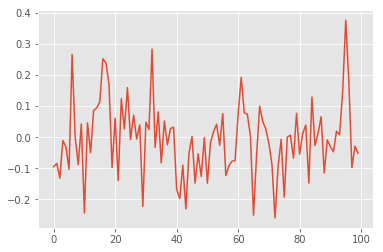

In [12]:
plt.plot(res[:, 0, 1])

(array([14., 14., 27., 18., 16.,  4.,  5.,  1.,  0.,  1.]),
 array([0.2072738 , 0.45910589, 0.71093797, 0.96277006, 1.21460214,
        1.46643422, 1.71826631, 1.97009839, 2.22193047, 2.47376256,
        2.72559464]),
 <a list of 10 Patch objects>)

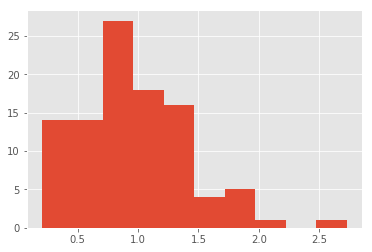

In [18]:
plt.hist(res[0])

(array([ 7.,  4.,  6., 13., 16., 18., 11.,  9., 11.,  5.]),
 array([0.48508485, 0.58374253, 0.68240022, 0.78105791, 0.87971559,
        0.97837328, 1.07703097, 1.17568866, 1.27434634, 1.37300403,
        1.47166172]),
 <a list of 10 Patch objects>)

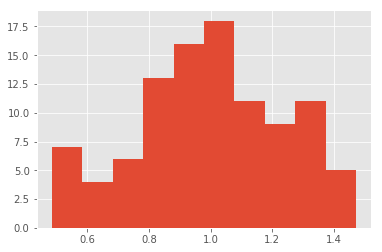

In [19]:
plt.hist(res[5])